# ESMCMC: Richness-Mass Scaling Relation Calibration

---
**License**

 ESMCMC_RM_SR_Models

 Mon Nov 11 10:30:00 2024\
 Copyright  2024\
 Cinthia Nunes de Lima <cinthia.n.lima@uel.br> \ Sandro Dias Pinto Vitenti <vitenti@uel.br>

---
---

 ESMCMC_RM_SR_Models\
 Copyright (C) 2024 Cinthia Nunes de Lima <cinthia.n.lima@uel.br>, Sandro Dias Pinto Vitenti <vitenti@uel.br>

 numcosmo is free software: you can redistribute it and/or modify it
 under the terms of the GNU General Public License as published by the
 Free Software Foundation, either version 3 of the License, or
 (at your option) any later version.

 numcosmo is distributed in the hope that it will be useful, but
 WITHOUT ANY WARRANTY; without even the implied warranty of
 MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
 See the GNU General Public License for more details.

 You should have received a copy of the GNU General Public License along
 with this program.  If not, see <http://www.gnu.org/licenses/>.
 
---

## Settings

In [4]:
import sys
sys.path.insert(0, "/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/")
sys.path.insert(0, "/global/homes/l/lettieri/NumCosmo/notebooks/richness_proxy/ESMCMC")

from esmcmc_rm_relation_script import catalog_fit, esmcmc

#NumCosmo
from numcosmo_py import Ncm, Nc, GObject
Ncm.cfg_init()
Ncm.cfg_set_log_handler(lambda msg: sys.stdout.write(msg) and sys.stdout.flush())

#Useful packages
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

#GCR Catalogs
sys.path.insert(0, "/global/homes/l/lettieri/gcr-catalogs")
import GCRCatalogs
GCRCatalogs.set_root_dir_by_site("nersc")

#Corner plots 
from getdist import plots
from getdist.mcsamples import  MCSamples
import getdist
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

import pygtc
from IPython.display import display, Math
%matplotlib inline


import warnings


GetDist Version: 1.5.3, Matplotlib version: 3.10.0


## Data

In [5]:
RICH_CUT = 5
MASS_CUT = 0

Catalog info:
Catalog size: 27581
Richness: min: 5.01; max: 266.30.
Redshift: min: 0.09; max: 1.17.
Mass: min: 1e+13; max: 9.9e+14.

Cut data:
Catalog size: 27581.
Richness: min: 5.01; max: 266.30
Mass: min: 1e+13; max: 9.9e+14.


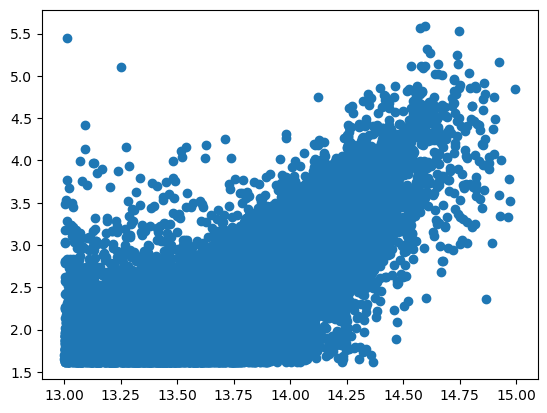

In [6]:
cDC2 = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/forecast/DC2/catalogs/redmapper_halos.fits').to_pandas()

rich_data = cDC2["R"]
z_data = cDC2["z"]
mass_data = 10**cDC2["log10M"]

cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
rich_data
#Data cut:
cDC2_data = cDC2_data[cDC2_data['richness'] > RICH_CUT]
cDC2_data = cDC2_data[cDC2_data['mass'] > MASS_CUT]

print(f'Catalog info:\nCatalog size: {len(rich_data)}\nRichness: min: {min( rich_data):.2f}; max: {max(rich_data):.2f}.\nRedshift: min: {min( z_data):.2f}; max: {max(z_data):.2f}.\nMass: min: {min( mass_data):.2}; max: {max(mass_data):.2}.\n')

richness_dt = cDC2_data['richness']
mass_dt = cDC2_data['mass']

print(f'Cut data:\nCatalog size: {len(cDC2_data)}.\nRichness: min: {min(richness_dt):.2f}; max: {max(richness_dt):.2f}\nMass: min: {min( mass_dt):.2}; max: {max(mass_dt):.2}.')

plt.scatter(np.log10(mass_data), np.log(rich_data))

## Quadratic Model MCMC

In [4]:
# N_WALKERS = 1200
# N_RUN = 300
# MODEL = 'ext'
# FILE_NAME = "full_data_set_mcmc/"+MODEL+".fits"

# esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL, FILE_NAME)


## Linear Model MCMC

In [5]:
# N_WALKERS = 1200
# N_RUN = 300
# MODEL2 = 'asc'
# FILE_NAME2 ="full_data_set_mcmc/"+MODEL2+".fits"

# esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL2, FILE_NAME2)

## Bayes Factor

Given two models $M_{1}$ and $M_2$, with parameters vectors $\theta_{1}$ and $\theta_{2}$, for a oberved data D, the Bayes Factor is defined as (see [Kass and Raftery, 1995](https://sites.stat.washington.edu/raftery/Research/PDF/kass1995.pdf]) and [John and Narlikar, 2002](https://journals.aps.org/prd/pdf/10.1103/PhysRevD.65.043506), for more details):

$$
BF = \frac{P(D|M_{1})}{P(D|M_{2})} =  \frac{\int d\theta_{1} P(D|\theta_{1}, M_{1}) P(\theta_{1}, M_{1}) }{\int d\theta_{2} P(D|\theta_{2}, M_{2}) P(\theta_{2}, M_{2})}. 
$$

Where, $P(D|M_{1})$ and $P(D|M_{2})$ are the likelihood and, $P(\theta_{1}, M_{1})$ and $P(\theta_{2}, M_{2})$ are the priors for parameters $\theta_{1}$ and $\theta_{2}$.


BF interpretation, according to Kass and Raftery, 1995:

$\log_{10}$BF| BF | Strength of evidence|
| --------: | --------: | :------- |
|0 < $\log_{10}$BF < 1/2| 1 < BF < 3.2  |  Not worth more than a bare mention|
| 1/2 < $\log_{10}$BF < 1| 3.2 < BF < 10 |  Substantial|
| 1 < $\log_{10}$BF < 2| 10 < BF < 100| Strong|
| $\log_{10}$BF > 2| BF > 100|  Decisive|







### Bayes Factor (full data set)

In [ ]:
# Bayesian Evidence Quadratic Model:

N_WALKERS1 = 1200
BURNIN1 = 55
FILE_NAME = "/global/homes/l/lettieri/ESMCMC/full_data_set_mcmc/ext.fits"
mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME, N_WALKERS1 * BURNIN1)
be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
# lnevol, glnvol = mcat2.get_post_lnvol(0.6827)
# Bayesian Evidence Linear Model:

BURNIN2 = 75
N_WALKERS2 = 1200
FILE_NAME2 = "/global/homes/l/lettieri/ESMCMC/full_data_set_mcmc/asc.fits"
mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS2 * BURNIN2)
be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
# lnevol, glnvol = mcat2.get_post_lnvol(0.6827)

print(f'BEQ = {be1:.3f} +/- {post_lnnorm_sd1:.3f}.\nBEL = {be2:.3f} +/- {post_lnnorm_sd2:.3f}.\n\nBF = {np.exp(be1 - be2):.3e}.')


BEQ - Beyesian evidence - quadratic model.

BEL - Beyesian evidence - linear model.

BF - Bayes factor.

### Analysis using mass and richness thresholds

#### MCMC 

In [7]:
RICH_CUT_list = [5 , 10 ,15 ,20]
MASS_CUT_list = [5e13, 8e13, 1e14]

cDC2 = Table.read('/global/homes/l/lettieri/NumCosmo/notebooks/forecast/DC2/catalogs/redmapper_halos.fits').to_pandas()
    
rich_data = cDC2["R"]
z_data = cDC2["z"]
mass_data = 10**cDC2["log10M"]
   

for RICH_CUT in RICH_CUT_list:
    for MASS_CUT in MASS_CUT_list:

     
        cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
        #Data cut:
        cDC2_data = cDC2_data[cDC2_data['richness'] > RICH_CUT]
        cDC2_data = cDC2_data[cDC2_data['mass'] > MASS_CUT]
        
        N_WALKERS = 1200
        N_RUN = 300
        
        MODEL = 'ext'
        FILE_NAME = "r_threshold_mcmc/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
        esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL, FILE_NAME)
    
        MODEL2 = 'asc'
        FILE_NAME2 = "r_threshold_mcmc/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
    
        esmcmc(cDC2_data, RICH_CUT, N_WALKERS, N_RUN, MODEL2, FILE_NAME2)



#----------------------------------------------------------------------------------
# Data used:
#   - NcDataClusterMassRich
#----------------------------------------------------------------------------------
# Model[09000]:
#   - NcClusterMass : LnrichExt Ln-normal richness distribution
#----------------------------------------------------------------------------------
# Model parameters
#   -      mu[00]:  3.19                [FREE]
#   -    muM1[01]:  0.868588963806504   [FREE]
#   -    muZ1[02]: -0.304006137332276   [FREE]
#   -    muM2[03]:  0                   [FREE]
#   -    muZ2[04]:  0                   [FREE]
#   -    muMZ[05]:  0                   [FREE]
#   -  sigma0[06]:  0.33                [FREE]
#   - sigmaM1[07]: -0.0347435585522601  [FREE]
#   - sigmaZ1[08]:  0                   [FREE]
#   - sigmaM2[09]:  0                   [FREE]
#   - sigmaZ2[10]:  0                   [FREE]
#   - sigmaMZ[11]:  0                   [FREE]
#   -      A0[12]:  0                   [FIX

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.2233410
#  iteration            [000113]
#  function evaluations [000115]
#  gradient evaluations [000000]
#  degrees of freedom   [012084]
#  m2lnL     =     8235.61757791308 (     8210.6177 )
#  Fit parameters:
 4.06216053826334       1.01917120957177       0.261172592625659      0.622271181985994      0.0780882841684308     0.0255645555207414    
# NcmMSetCatalog: Current mean:   8266.1       4.0646       1.0243       0.25743      0.6174       0.073006     0.028455   
# NcmMSetCatalog: Current msd:    0.50407      0.00019405   0.00010798   0.00017832   0.00010771   7.2555e-05   0.00018765 
# NcmMSetCatalog: Current sd:     109.05       0.041979     0.023359     0.038577     0.023301     0.015696     0.040594   
# NcmMSetCatalog: Current var:    11891        0.0017623    0.00054563   0.0014882    0.00054293   0.00024637   0.0016479  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1209830
#  iteration            [000112]
#  function evaluations [000114]
#  gradient evaluations [000000]
#  degrees of freedom   [006321]
#  m2lnL     =     6338.51933815631 (     6331.9618 )
#  Fit parameters:
 4.04233582809248       1.00337227669179       0.366437673820628      0.621370381724426      0.081181184515911      0.0847998865405315    
# NcmMSetCatalog: Current mean:   6367.2       4.0405       1.0005       0.35874      0.62348      0.082742     0.080628   
# NcmMSetCatalog: Current msd:    0.27835      0.00018183   0.00010219   0.00018345   9.8147e-05   8.6211e-05   0.00019225 
# NcmMSetCatalog: Current sd:     63.23        0.041303     0.023213     0.041671     0.022295     0.019583     0.043671   
# NcmMSetCatalog: Current var:    3998         0.001706     0.00053886   0.0017365    0.00049705   0.00038351   0.0019071  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  1          
# NcmMSetCatalog: Current skfac:  1.0022       1.0286       1.0316       1.0343       1.0324       1.036        1.0334       1.0315       1.0318       1.0334       1.0322       1.0364       1.0322     
# NcmMSetCatalog: Maximal Shrink factor = 1.03814               
#----------------------------------------------------------------------------------
# NcmMSetCatalog: Computing the constant break point for parameter `0', sample size `211':
# NcmMSetCatalog: Constant break point at `31':
# NcmFitESMCMC:acceptance ratio 14.4329% (last update 14.0833%), offboard ratio  0.0000% (last update  0.0000%).
# NcmFitESMCMC:last ensemble variance of -2ln(L):       23.5713699451087 (2n = 24), min(-2ln(L)) =       875.766338614972.
# Task:NcmFitESMCMC, completed: 253200 of 360000, elapsed time: 00:04:04.8155
# Task:NcmFitESMCMC, mean time: 00:00:00.0010 +/- 00:00:00.0001
# Task:NcmFitESMCMC, time left: 00:01:43.2427 +/- 00:00:07.1039
# Task:NcmFitESMCMC, current time:        Tue Mar 25 2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1524110
#  iteration            [000135]
#  function evaluations [000137]
#  gradient evaluations [000000]
#  degrees of freedom   [007589]
#  m2lnL     =     923.316408578847 (     917.35887 )
#  Fit parameters:
 4.01991294166949       0.937979907078652      0.302776201415537      0.606454629097784      0.0930168742721843     0.0343049896916335    
# NcmMSetCatalog: Current mean:   933.32       4.0206       0.93934      0.30252      0.60584      0.092098     0.035578   
# NcmMSetCatalog: Current msd:    0.078516     7.5129e-05   5.2454e-05   0.00013081   4.0002e-05   2.901e-05    8.4003e-05 
# NcmMSetCatalog: Current sd:     35.567       0.034033     0.023761     0.059255     0.018121     0.013141     0.038053   
# NcmMSetCatalog: Current var:    1265         0.0011582    0.00056459   0.0035111    0.00032836   0.00017269   0.001448   
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1524110
#  iteration            [000135]
#  function evaluations [000137]
#  gradient evaluations [000000]
#  degrees of freedom   [007589]
#  m2lnL     =     923.441252326652 (     917.35887 )
#  Fit parameters:
 4.02064148012678       0.939005833280193      0.304135524850525      0.607018781367572      0.0931572285793959     0.0342485036323845    
# NcmMSetCatalog: Current mean:   931.79       4.0206       0.93925      0.30251      0.60596      0.092223     0.035568   
# NcmMSetCatalog: Current msd:    0.066925     6.5748e-05   4.6994e-05   0.00012081   3.5504e-05   2.5689e-05   7.6543e-05 
# NcmMSetCatalog: Current sd:     32.95        0.03237      0.023137     0.059479     0.01748      0.012648     0.037685   
# NcmMSetCatalog: Current var:    1085.7       0.0010478    0.00053532   0.0035378    0.00030555   0.00015997   0.0014202  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1824480
#  iteration            [000198]
#  function evaluations [000200]
#  gradient evaluations [000000]
#  degrees of freedom   [005150]
#  m2lnL     =     2578.26386296764 (      2566.147 )
#  Fit parameters:
 4.02044095716034       0.750123469766325      0.424957201621289     -0.125282884382399     -1.61574034011491       0.177765231666111      0.588592710236584      0.1110354697539       -0.0513011968816781     0.0183361423047686     0.427703249011502     -0.192280400808007     
# NcmMSetCatalog: Current mean:   2583.1       4.0201       0.75141      0.41636     -0.12349     -1.6276       0.16972      0.58815      0.10863     -0.044911     0.016624     0.42221     -0.18724    
# NcmMSetCatalog: Current msd:    0.078448     9.0415e-05   0.00015197   0.00036623   9.8961e-05   0.00097893   0.00039559   5.5133e-05   0.00010469   0.00026716   6.2655e-05   0.00066969   0.00025831 
# NcmMSetCatalog: Current sd:     30.383       0.035018     0.058856   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.0964960
#  iteration            [000114]
#  function evaluations [000116]
#  gradient evaluations [000000]
#  degrees of freedom   [005156]
#  m2lnL     =     2606.28392832097 (     2600.1752 )
#  Fit parameters:
 4.01188745588906       0.92396259659427       0.283960525074643      0.622943436131657      0.115058432568846      0.131218452054701     
# NcmMSetCatalog: Current mean:   2610.6       4.0113       0.92368      0.28496      0.62214      0.11442      0.1305     
# NcmMSetCatalog: Current msd:    0.037821     4.8787e-05   4.0146e-05   0.00010619   3.3291e-05   2.9531e-05   7.5283e-05 
# NcmMSetCatalog: Current sd:     22.655       0.029223     0.024048     0.063605     0.019941     0.017689     0.045094   
# NcmMSetCatalog: Current var:    513.25       0.000854     0.00057829   0.0040457    0.00039765   0.0003129    0.0020335  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1690180
#  iteration            [000117]
#  function evaluations [000119]
#  gradient evaluations [000000]
#  degrees of freedom   [003836]
#  m2lnL     =     2696.63812936298 (     2690.6161 )
#  Fit parameters:
 4.00202507255347       0.908988856155214      0.278463845473513      0.622928283180876      0.119542317327992      0.114129652236184     
# NcmMSetCatalog: Current mean:   2704.3       4.0001       0.90892      0.27979      0.62292      0.11923      0.11322    
# NcmMSetCatalog: Current msd:    0.074661     9.5749e-05   7.4396e-05   0.00018104   5.7459e-05   5.9083e-05   0.00012994 
# NcmMSetCatalog: Current sd:     27.126       0.034787     0.02703      0.065775     0.020876     0.021466     0.047211   
# NcmMSetCatalog: Current var:    735.8        0.0012102    0.0007306    0.0043264    0.0004358    0.00046078   0.0022289  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.0974710
#  iteration            [000143]
#  function evaluations [000145]
#  gradient evaluations [000000]
#  degrees of freedom   [004578]
#  m2lnL     =     -569.05050412179 (    -575.11706 )
#  Fit parameters:
 4.00202777947082       0.847913939160092      0.367437715982714      0.579776651163312      0.100166719406557      0.0170086654487627    
# NcmMSetCatalog: Current mean:  -562.96       4.0017       0.84773      0.36726      0.57936      0.099502     0.015877   
# NcmMSetCatalog: Current msd:    0.057587     7.9956e-05   6.8736e-05   0.00020244   4.2445e-05   3.017e-05    0.00010719 
# NcmMSetCatalog: Current sd:     23.855       0.033122     0.028474     0.08386      0.017583     0.012498     0.044403   
# NcmMSetCatalog: Current var:    569.06       0.001097     0.00081076   0.0070325    0.00030915   0.00015619   0.0019716  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



 0.79281      0.2839       0.61229      0.15095      0.13348    
# NcmMSetCatalog: Current msd:    0.046633     7.8909e-05   7.0474e-05   0.00017572   4.6538e-05   4.0902e-05   0.00011318 
# NcmMSetCatalog: Current sd:     21.913       0.037079     0.033115     0.082567     0.021868     0.01922      0.053181   
# NcmMSetCatalog: Current var:    480.17       0.0013748    0.0010966    0.0068174    0.00047821   0.00036939   0.0028282  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1          
# NcmMSetCatalog: Current skfac:  1.0172       1.0219       1.0149       1.0083       1.016        1.0141       1.0106     
# NcmMSetCatalog: Maximal Shrink factor = 1.02878               
#----------------------------------------------------------------------------------
# NcmMSetCatalog: Computing the constant break point for parameter `0', sample size `184':
# NcmMSetCatalog: Constant break point at `37':
# NcmFitESMCMC:acceptance r

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1258410
#  iteration            [000228]
#  function evaluations [000230]
#  gradient evaluations [000000]
#  degrees of freedom   [003042]
#  m2lnL     =     960.414424835341 (     948.15812 )
#  Fit parameters:
 4.00959947958211       0.667046116123621      0.296451603092086     -0.130525054779914     -1.46153022253467       0.0472390032930596     0.58216161559213       0.128854903048336      0.0313500190919951    -0.000620232186841072   0.694891278522896     -0.116981022654842     
# NcmMSetCatalog: Current mean:   962.51       4.0109       0.66965      0.29397     -0.12945     -1.4599       0.042992     0.58217      0.12721      0.026597    -0.001689     0.68457     -0.11895    
# NcmMSetCatalog: Current msd:    0.035802     7.9188e-05   0.00015029   0.00038934   0.00013357   0.0013046    0.00053001   5.2666e-05   0.00011052   0.00030222   8.0638e-05   0.00083699   0.00031723 
# NcmMSetCatalog: Current sd:     16.313       0.036081     0.068476   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.3414090
#  iteration            [000619]
#  function evaluations [000621]
#  gradient evaluations [000000]
#  degrees of freedom   [002984]
#  m2lnL     =    -994.190184730173 (    -1006.4634 )
#  Fit parameters:
 3.99708252267441       0.392499463193827     -0.182348594035797     -0.263856474785986     -1.95477465509339      -0.867307318545986      0.616526718628959      0.376879469168132      0.309133042123374      0.142282466134533      0.745989055515755      0.338626877306994     
# NcmMSetCatalog: Current mean:  -991.66       3.9951       0.39635     -0.17518     -0.25992     -1.8483      -0.84834      0.61783      0.37796      0.30564      0.14241      0.70515      0.33091    
# NcmMSetCatalog: Current msd:    0.04161      9.8799e-05   0.00019757   0.00048966   0.0001387    0.0016033    0.00066042   7.1829e-05   0.00012842   0.00029622   5.4947e-05   0.0007596    0.00024653 
# NcmMSetCatalog: Current sd:     19.068       0.045275     0.09054    

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1122860
#  iteration            [000237]
#  function evaluations [000239]
#  gradient evaluations [000000]
#  degrees of freedom   [002687]
#  m2lnL     =    -459.935443077707 (     -472.3607 )
#  Fit parameters:
 3.99522574896071       0.532283736561766      0.0225975776029284    -0.115389491574291     -1.3647971841134       -0.485772735118278      0.603972379503247      0.273368886831498      0.169983639515408      0.0588276824242738     0.316545929510686      0.128436464371786     
# NcmMSetCatalog: Current mean:  -453.95       3.993        0.53907      0.038568    -0.10842     -1.2328      -0.45323      0.60523      0.27205      0.16958      0.056464     0.27281      0.11935    
# NcmMSetCatalog: Current msd:    0.093017     0.0001568    0.00026279   0.00066386   0.00019966   0.0019431    0.00086541   0.00010835   0.00019653   0.00043506   0.0001112    0.0011033    0.00041914 
# NcmMSetCatalog: Current sd:     27.718       0.046725     0.078308   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.1122860
#  iteration            [000237]
#  function evaluations [000239]
#  gradient evaluations [000000]
#  degrees of freedom   [002687]
#  m2lnL     =     -459.97570715787 (     -472.3607 )
#  Fit parameters:
 3.99851849801047       0.536598686055237      0.0287949223026725    -0.113353639859513     -1.41093665957997      -0.486513585015048      0.602684779286041      0.270868170524386      0.159628409165525      0.057210818415738      0.334583296778039      0.12308628322007      
# NcmMSetCatalog: Current mean:  -458.36       3.9959       0.53671      0.027194    -0.11202     -1.3412      -0.47865      0.60414      0.27231      0.16391      0.057604     0.30359      0.12204    
# NcmMSetCatalog: Current msd:    0.02656      7.1413e-05   0.00014393   0.00038561   0.00010962   0.0012426    0.00051209   5.3385e-05   0.00010457   0.00025249   5.8814e-05   0.00065752   0.00024691 
# NcmMSetCatalog: Current sd:     15.258       0.041023     0.082679   

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



#  Elapsed time: 00 days, 00:00:00.0682660
#  iteration            [000180]
#  function evaluations [000182]
#  gradient evaluations [000000]
#  degrees of freedom   [002331]
#  m2lnL     =    -5.40511047292919 (    -11.507357 )
#  Fit parameters:
 3.97976656896874       0.648150884701027      0.309934243765918      0.614158662079226      0.229521686408575      0.120174194792686     
# NcmMSetCatalog: Current mean:   12.798       3.9671       0.64068      0.30991      0.61842      0.2308       0.11826    
# NcmMSetCatalog: Current msd:    0.15519      0.0002931    0.00019945   0.0003569    0.00016345   0.00014312   0.00024878 
# NcmMSetCatalog: Current sd:     34.841       0.065801     0.044776     0.080124     0.036693     0.032131     0.05585    
# NcmMSetCatalog: Current var:    1213.9       0.0043298    0.0020049    0.0064199    0.0013464    0.0010324    0.0031193  
# NcmMSetCatalog: Current tau:    1            1            1            1            1            1            1    

In [8]:
RICH_CUT_list = [5 , 10 ,15 ,20]
MASS_CUT_list = [5e13, 8e13, 1e14]

bef_list = []
mean_ext_list = []

for mcut in MASS_CUT_list:

    bef = pd.DataFrame(data = {'Min_Mass':[], 'Min_Richness': [], 'BEQ': [], 'BEQ Err': [], 'BEL': [], 'BEL Err': [], 'BF': [], 'muM2': [], 'sd_muM2': []})


    mean_ext = []

    for rcut in RICH_CUT_list:
        
        N_WALKERS = 1200
        N_RUN = 300
        
        RICH_CUT = rcut
        MASS_CUT = mcut
        
        MODEL = 'ext'
        FILE_NAME1 = "r_threshold_mcmc/"+MODEL+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"   
        
        MODEL2 = 'asc'
        FILE_NAME2 = "r_threshold_mcmc/"+MODEL2+"_rmin_"+str(RICH_CUT)+"_mmin_"+str(MASS_CUT)+".fits"
        
        burnin_cat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
        mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * burnin_cat1)
        be1, post_lnnorm_sd1 = mcat1.get_post_lnnorm()
        # lnevol1, glnvol1 = mcat1.get_post_lnvol(0.6827)

        burnin_cat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, 0.0).peek_e_mean_stats().estimate_const_break(0) + 10  
        mcat2 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME2, N_WALKERS * burnin_cat2)
        be2, post_lnnorm_sd2 = mcat2.get_post_lnnorm()
        # lnevol2, glnvol2 = mcat2.get_post_lnvol(0.6827)

        mcat1 = Ncm.MSetCatalog.new_from_file_ro(FILE_NAME1, N_WALKERS * burnin_cat1)
        mset1 = mcat1.get_mset()

        muM2 = mcat1.get_bestfit_row().dup_array()[4]
        sd_muM2 = mcat1.peek_pstats().get_sd(4) 

        bf = np.exp(be1 - be2)
        
        bef = pd.concat([bef, pd.DataFrame([{'Min_Mass':mcut, 'Min_Richness': rcut,  'BEQ': be1, 'BEQ Err': post_lnnorm_sd1, 'BEL': be2, 'BEL Err':post_lnnorm_sd2, 'BF': bf, 'muM2':muM2, 'sd_muM2': sd_muM2}])], ignore_index=True)

        cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
        #Data cut:
        cDC2_data = cDC2_data[cDC2_data['richness'] > rcut]
        cDC2_data = cDC2_data[cDC2_data['mass'] > mcut]
        lnM = np.log(cDC2_data['mass'])
        z = cDC2_data['redshift']

        mset1.pretty_log()
        ext = mset1.peek_by_name('NcClusterMass')
        mean_ext.append(np.array([ext.get_mean(lnM[i], z[i]) for i in range(len(lnM))]))
    
    mean_ext_list.append(mean_ext)
    bef_list.append(bef)

#----------------------------------------------------------------------------------
# Model[09000]:
#   - NcClusterMass : LnrichExt Ln-normal richness distribution
#----------------------------------------------------------------------------------
# Model parameters
#   -      mu[00]:  4.03224013054056    [FREE]
#   -    muM1[01]:  0.874672367990523   [FREE]
#   -    muZ1[02]:  0.56854843034089    [FREE]
#   -    muM2[03]: -0.0608229213928945  [FREE]
#   -    muZ2[04]: -1.62857868983668    [FREE]
#   -    muMZ[05]:  0.180774377250498   [FREE]
#   -  sigma0[06]:  0.614074936538122   [FREE]
#   - sigmaM1[07]:  0.0853967710272638  [FREE]
#   - sigmaZ1[08]:  0.115155343702197   [FREE]
#   - sigmaM2[09]:  0.00673534366085162 [FREE]
#   - sigmaZ2[10]:  0.203173481603282   [FREE]
#   - sigmaMZ[11]:  0.0455234839403699  [FREE]
#   -      A0[12]:  0                   [FIXED]
#   -     cut[13]:  1.6094379124341     [FIXED]
#   -   cutM1[14]:  0                   [FIXED]
#   -   cutZ1[15]:  0    

#### Results

In [9]:
bf_datafame = pd.concat(bef_list)
bf_datafame.head(8)

Min_Mass  Min_Richness          BEQ   BEQ Err          BEL   BEL Err  \
0  5.000000e+13           5.0 -4094.553518  0.001808 -4126.847459  0.001394   
1  5.000000e+13          10.0  -466.659944  0.001878  -478.367140  0.001415   
2  5.000000e+13          15.0   277.662121  0.001916   269.380110  0.001339   
3  5.000000e+13          20.0   479.914016  0.001813   455.173704  0.001267   
0  8.000000e+13           5.0 -3172.591976  0.002122 -3185.623537  0.001332   
1  8.000000e+13          10.0 -1309.409627  0.002305 -1318.545097  0.001323   
2  8.000000e+13          15.0  -264.000714  0.002046  -261.017226  0.001276   
3  8.000000e+13          20.0   213.302991  0.002185   215.635180  0.001343   

             BF      muM2   sd_muM2  
0  1.059450e+14 -0.060823  0.017488  
1  1.214424e+05 -0.103012  0.031722  
2  3.952133e+03 -0.105897  0.050002  
3  5.553678e+10 -0.241529  0.065678  
0  4.565991e+05 -0.138806  0.028747  
1  9.278638e+03 -0.098596  0.038721  
2  5.061598e-02 -0.066558  0.054313  
3  9.708299e-02 -0.096777  0.064650

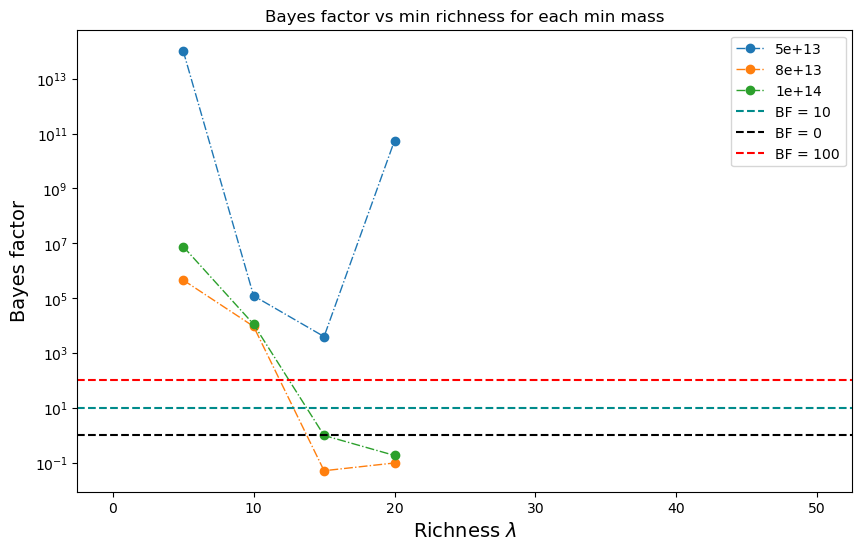

In [13]:
plt.figure(figsize=(10,6))

for i in range(0,3):
    plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["BF"], label = f'{MASS_CUT_list[i]:.2}', ls = '-.', linewidth = 1.0, marker = 'o')
    plt.yscale("log")
        
plt.axline((0, 10), (50, 10), c = 'darkcyan', ls= '--', label = 'BF = 10')
plt.axline((0, 1), (50, 1), c = 'k', ls= '--', label = 'BF = 0')
plt.axline((0, 100), (50, 100), c = 'r', ls= '--', label = 'BF = 100')
plt.legend()

plt.ylabel('Bayes factor', fontsize=14)
plt.xlabel(r'Richness $\lambda$', fontsize=14)
plt.title('Bayes factor vs min richness for each min mass' )

plt.show()

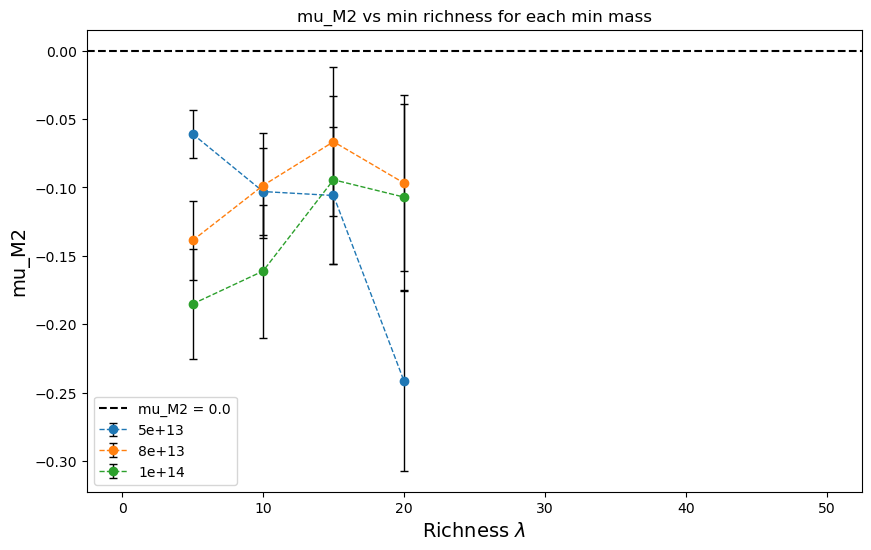

In [15]:
plt.figure(figsize=(10,6))

for i in range(0,3):
    # plt.plot(bef_list[i]["Min_Richness"], bef_list[i]["muM2"], label = f'{MASS_CUT_list[i]:.2}',ls = '-.', linewidth = 0.5, marker = 'o')
    # plt.yscale("log")
    plt.errorbar(bef_list[i]["Min_Richness"],  bef_list[i]["muM2"], yerr= bef_list[i]["sd_muM2"], ls= '--', linewidth = 1.0, ecolor = "black", capsize=3, marker = 'o',  label = f'{MASS_CUT_list[i]:.2}')
    plt.ylabel('mu_M2', fontsize=14)
    plt.xlabel(r'Richness $\lambda$', fontsize=14)
    plt.title('mu_M2 vs min richness for each min mass' )

plt.axline((0, 0), (50, 0), c = 'k', ls= '--', label = 'mu_M2 = 0.0')        
plt.legend()

plt.show()

ValueError: x and y must be the same size

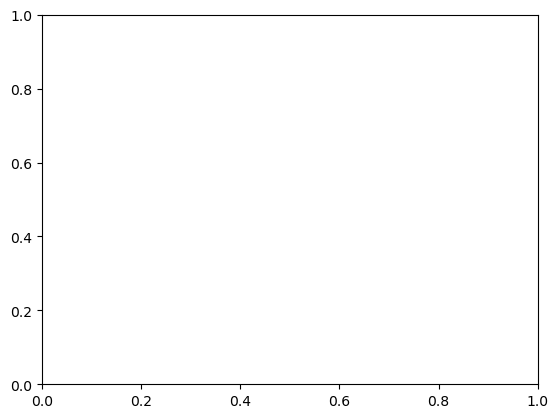

In [16]:
# fig, axs = plt.subplots(5,7, figsize=(15, 10), constrained_layout=True)
 
# for i, m in enumerate(MASS_CUT_list):
#     for j, r in enumerate(RICH_CUT_list):

#         cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
#         #Data cut:
#         cDC2_data = cDC2_data[cDC2_data['richness'] > r]
#         cDC2_data = cDC2_data[cDC2_data['mass'] > m]
        
#         lnM = np.log(cDC2_data['mass'])
#         z = cDC2_data['redshift']
  
#         axs[i, j].scatter(lnM, mean_ext_list[i][j])
#         axs[i, j].set_title(f'mass > {m:.1e} \n richness > {r}')

RICH_CUT_list = [5, 10, 15, 20]
MASS_CUT_list = [5e13, 8e13, 1e14]

for i, m in enumerate(MASS_CUT_list):
    for j, r in enumerate(RICH_CUT_list):

        cDC2_data = Table([mass_data, rich_data, z_data], names=('mass', 'richness', 'redshift'))
        
        #Data cut:
        cDC2_data = cDC2_data[cDC2_data['richness'] > r]
        cDC2_data = cDC2_data[cDC2_data['mass'] > m]
        
        lnM = np.log(cDC2_data['mass'])
        z = cDC2_data['redshift']
  
        plt.scatter(lnM, mean_ext_list[i][j])
        plt.title(f'mass > {m:.1e}')
    
    plt.show()


## Corner plots

In [ ]:
data_fit_full = pd.DataFrame(fits.open("/global/homes/l/lettieri/ESMCMC/full_data_set_mcmc/asc.fits")[1].data).iloc[:, 1:7].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
]
labels=[r"\mu_{0}", r"\mu_{1}", r"\mu_{2}", r"\sigma_{0}", r"\sigma_{1}", r"\sigma_{2}"]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples1 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples1.removeBurn(0.3)

In [ ]:
# Triangle plot
g1 = plots.get_subplot_plotter()

g1.settings.legend_fontsize = 18
g1.settings.lab_fontsize = 25
g1.settings.axes_fontsize = 20


g1.triangle_plot(
    [samples1],
    filled=True,
    contour_ls="-",
    contour_lws=1,
    fontsize=14,
    fine_bins=1,
    colors=['red'],
    line_args=[{'lw':1.2,'ls':'-', 'color':'red'}],
    legend_labels=["Ascaso"],
)

plt.show()
for i in range(1, 7):
    display(Math(samples1.getInlineLatex(str(i),limit=1)))
# plt.savefig('mcmc3.png')



In [ ]:
data_fit_full = pd.DataFrame(fits.open("/global/homes/l/lettieri/ESMCMC/full_data_set_mcmc/ext.fits")[1].data).iloc[:, 1:13].T
data_fit_void = np.array(data_fit_full)
data_fit = []
for item in data_fit_void:
    arr= np.array(item)
    data_fit.append(np.asarray(arr.tolist()))

names = [
    '1',
    '2',
    '3',
    '4',
    '5',
    '6',
    '7',
    '8',
    '9',
    '10',
    '11',
    '12'
]
labels=[r"\mu_0", r"\mu_{M1}", r"\mu_{M2}", r"\mu_{Z1}",r" \mu_{Z2}", r"\mu_{MZ}", r"\sigma_0", r"\sigma_{M1}", r"\sigma_{M2}", r"\sigma_{Z1}", r"\sigma_{Z2}", r"\sigma_{MZ}" ]
settings = {
    "mult_bias_correction_order": 0,
    "smooth_scale_2D": 3,
    "smooth_scale_1D": 3,
    "boundary_correction_order": 0,
}
samples2 = MCSamples(samples=data_fit, names=names, labels=labels, settings=settings)
samples2.removeBurn(0.3)


In [ ]:
# Triangle plot
g2 = plots.get_subplot_plotter()

g2.settings.lab_fontsize = 40
g2.settings.legend_fontsize = 40
g2.settings.axes_fontsize = 30

g2.triangle_plot(
    [samples2],
    filled=True,
    contour_ls="-",
    contour_lws=1,
    fine_bins=1,
    colors=['#b186f1'],
    fontsize=70,
    line_args=[{'lw':1.2,'ls':'-', 'color':'#b186f1'}],
    legend_labels=["Estendido", ],
)
#plt.savefig('mcmc.png')
plt.show()


In [ ]:
for i in range(1, 13):
    display(Math(samples2.getInlineLatex(str(i),limit=1)))
